In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go
import plotly.express as px

plt.style.context('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
pizza = pd.read_csv('Pizza Sales.csv')
pizza.head()

order_details_id  order_id       pizza_id  quantity order_date order_time  \
0                 1         1     hawaiian_m         1   1/1/2015   11:38:36   
1                 2         2  classic_dlx_m         1   1/1/2015   11:57:40   
2                 3         2  five_cheese_l         1   1/1/2015   11:57:40   
3                 4         2    ital_supr_l         1   1/1/2015   11:57:40   
4                 5         2     mexicana_m         1   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name  
0         The Hawaiian Pizza  
1   The Classic Deluxe Pizza  
2      The Five Cheese Pizza  
3  The Italian Supreme Pizza  
4         The Mexicana Pizza

In [3]:
pizza.info()
print(pizza.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
(48620, 12)


In [4]:
#Checking duplicated
pizza.duplicated().sum()

np.int64(0)

In [5]:
pizza.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [6]:
# Convert order_date to datetime
pizza['order_date'] = pd.to_datetime(pizza['order_date'])

#Convert order_time to a timedelta
pizza['order_time'] = pd.to_timedelta(pizza['order_time'])

# Combine order_date and order_time into a single datetime column
pizza['order_datetime'] = pizza['order_date'] + pizza['order_time']
pizza[['order_date', 'order_time', 'order_datetime']]

order_date      order_time      order_datetime
0     2015-01-01 0 days 11:38:36 2015-01-01 11:38:36
1     2015-01-01 0 days 11:57:40 2015-01-01 11:57:40
2     2015-01-01 0 days 11:57:40 2015-01-01 11:57:40
3     2015-01-01 0 days 11:57:40 2015-01-01 11:57:40
4     2015-01-01 0 days 11:57:40 2015-01-01 11:57:40
...          ...             ...                 ...
48615 2015-12-31 0 days 21:23:10 2015-12-31 21:23:10
48616 2015-12-31 0 days 21:23:10 2015-12-31 21:23:10
48617 2015-12-31 0 days 21:23:10 2015-12-31 21:23:10
48618 2015-12-31 0 days 22:09:54 2015-12-31 22:09:54
48619 2015-12-31 0 days 23:02:05 2015-12-31 23:02:05

[48620 rows x 3 columns]

In [7]:
pizza.head()

order_details_id  order_id       pizza_id  quantity order_date  \
0                 1         1     hawaiian_m         1 2015-01-01   
1                 2         2  classic_dlx_m         1 2015-01-01   
2                 3         2  five_cheese_l         1 2015-01-01   
3                 4         2    ital_supr_l         1 2015-01-01   
4                 5         2     mexicana_m         1 2015-01-01   

       order_time  unit_price  total_price pizza_size pizza_category  \
0 0 days 11:38:36       13.25        13.25          M        Classic   
1 0 days 11:57:40       16.00        16.00          M        Classic   
2 0 days 11:57:40       18.50        18.50          L         Veggie   
3 0 days 11:57:40       20.75        20.75          L        Supreme   
4 0 days 11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name      order_datetime  
0         The Hawaiian Pizza 2015-01-01 11:38:36  
1   The Classic Deluxe Pizza 2015-01-01 11:57:40  
2      The Five Cheese Pizza 2015-01-01 11:57:40  
3  The Italian Supreme Pizza 2015-01-01 11:57:40  
4         The Mexicana Pizza 2015-01-01 11:57:40

In [8]:
pizza.drop(columns = ['order_date','order_time'], inplace=True)
pizza.head()

order_details_id  order_id       pizza_id  quantity  unit_price  \
0                 1         1     hawaiian_m         1       13.25   
1                 2         2  classic_dlx_m         1       16.00   
2                 3         2  five_cheese_l         1       18.50   
3                 4         2    ital_supr_l         1       20.75   
4                 5         2     mexicana_m         1       16.00   

   total_price pizza_size pizza_category  \
0        13.25          M        Classic   
1        16.00          M        Classic   
2        18.50          L         Veggie   
3        20.75          L        Supreme   
4        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name      order_datetime  
0         The Hawaiian Pizza 2015-01-01 11:38:36  
1   The Classic Deluxe Pizza 2015-01-01 11:57:40  
2      The Five Cheese Pizza 2015-01-01 11:57:40  
3  The Italian Supreme Pizza 2015-01-01 11:57:40  
4         The Mexicana Pizza 2015-01-01 11:57:40

In [9]:
#Cleaning the Data
pizza.drop(columns = ['order_details_id','order_id'],inplace = True)
pizza.head(7)

pizza_id  quantity  unit_price  total_price pizza_size pizza_category  \
0     hawaiian_m         1       13.25        13.25          M        Classic   
1  classic_dlx_m         1       16.00        16.00          M        Classic   
2  five_cheese_l         1       18.50        18.50          L         Veggie   
3    ital_supr_l         1       20.75        20.75          L        Supreme   
4     mexicana_m         1       16.00        16.00          M         Veggie   
5     thai_ckn_l         1       20.75        20.75          L        Chicken   
6    ital_supr_m         1       16.50        16.50          M        Supreme   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   
5  Chicken, Pineapple, Tomatoes, Red Peppers, Tha...   
6  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   

                  pizza_name      order_datetime  
0         The Hawaiian Pizza 2015-01-01 11:38:36  
1   The Classic Deluxe Pizza 2015-01-01 11:57:40  
2      The Five Cheese Pizza 2015-01-01 11:57:40  
3  The Italian Supreme Pizza 2015-01-01 11:57:40  
4         The Mexicana Pizza 2015-01-01 11:57:40  
5     The Thai Chicken Pizza 2015-01-01 11:57:40  
6  The Italian Supreme Pizza 2015-01-01 12:12:28

In [10]:
pizza[['quantity','unit_price', 'total_price']].value_counts()

quantity  unit_price  total_price
1         20.75       20.75          8485
          12.00       12.00          5465
          16.00       16.00          4428
          16.75       16.75          4211
          16.50       16.50          3970
          12.50       12.50          3278
          20.25       20.25          2971
          12.75       12.75          2485
          20.50       20.50          1971
          18.50       18.50          1310
          17.95       17.95          1230
          16.25       16.25          1094
          10.50       10.50           982
          12.25       12.25           810
          9.75        9.75            727
          15.25       15.25           696
          14.75       14.75           568
          11.00       11.00           562
          25.50       25.50           536
          23.65       23.65           470
          13.25       13.25           463
          14.50       14.50           385
          17.50       17.50           378


In [11]:
pizza['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

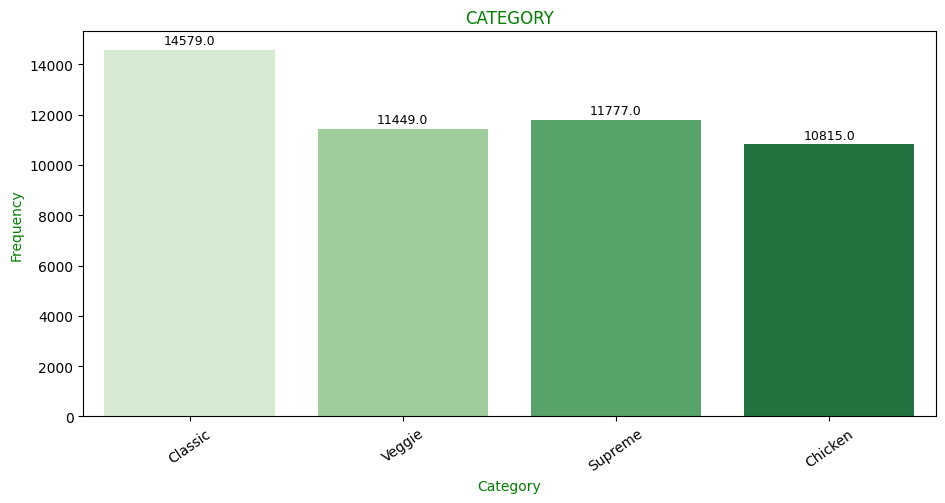

In [12]:
plt.figure(figsize = (11,5))

ax = sns.countplot(data=pizza, x="pizza_category", palette="Greens")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=9, color='black', 
                xytext=(0, 2), textcoords='offset points')

plt.xticks(rotation=35)
plt.xlabel("Category",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("CATEGORY",color="green")
plt.show()

Text(0.5, 1.0, 'Pizza Categories')

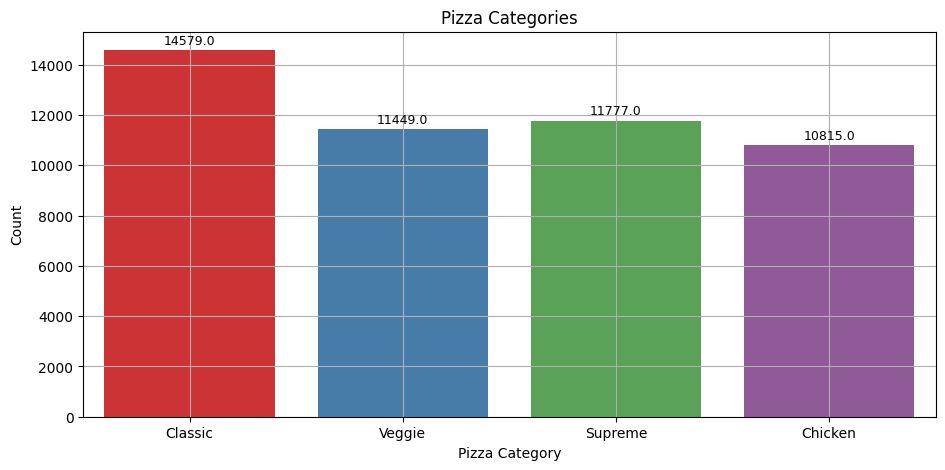

In [13]:
plt.figure(figsize = (11,5))

ax = sns.countplot(data=pizza, x="pizza_category", palette="Set1")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=9, color='black', 
                xytext=(0, 2), textcoords='offset points')
    
plt.grid(True)
plt.xlabel('Pizza Category')
plt.ylabel('Count')
plt.title('Pizza Categories')

In [14]:
pizza['pizza_name'].value_counts(ascending=False)

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

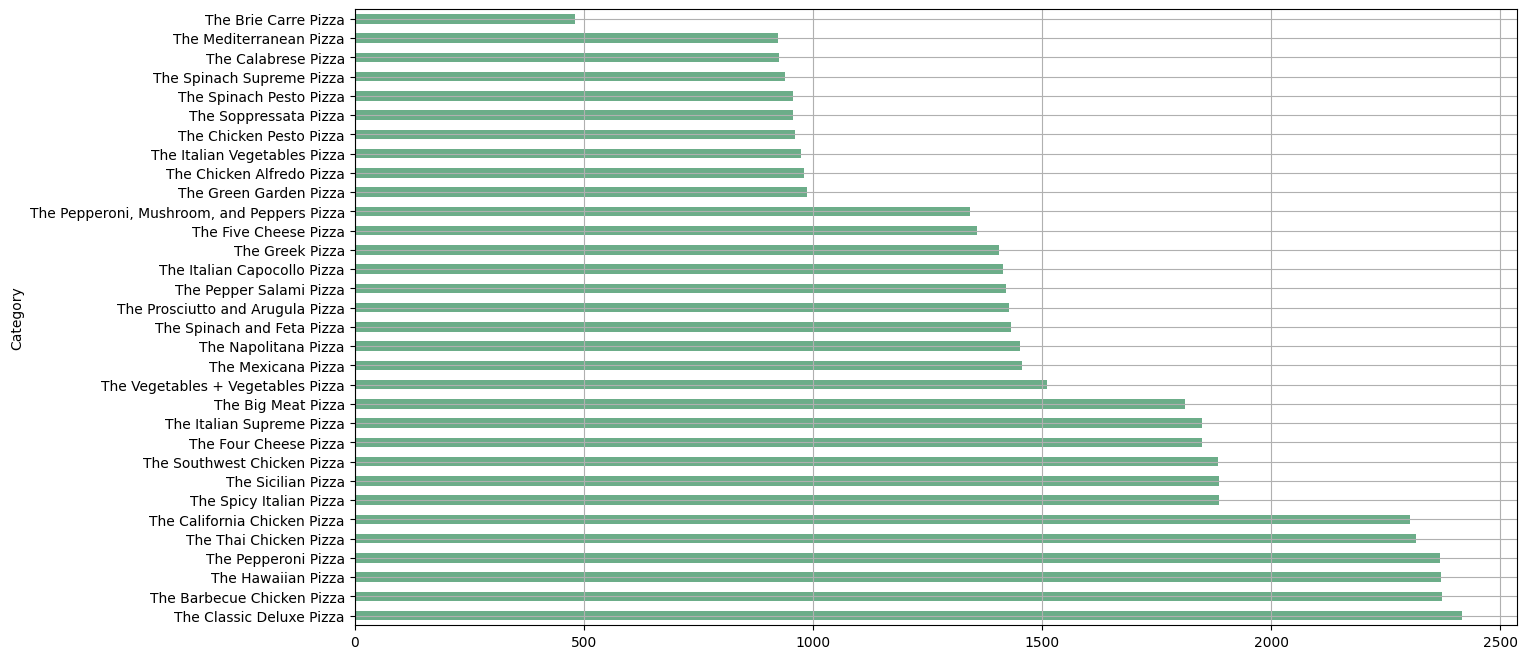

In [15]:
#| Count 
plt.figure(figsize=(15,8))
pizza['pizza_name'].value_counts().plot(kind='barh', color = 'seagreen', alpha= 0.7)
# show the plot 
plt.ylabel("Category",fontsize=10,color="black")
plt.grid(True)
plt.show()

In [16]:
pizza['day'] = pizza['order_datetime'].dt.day_name()
days_orders = pizza['day'].value_counts()
days_orders

day
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: count, dtype: int64

In [17]:
pizza['pizza_ingredients'].value_counts(ascending=False)

pizza_ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola P

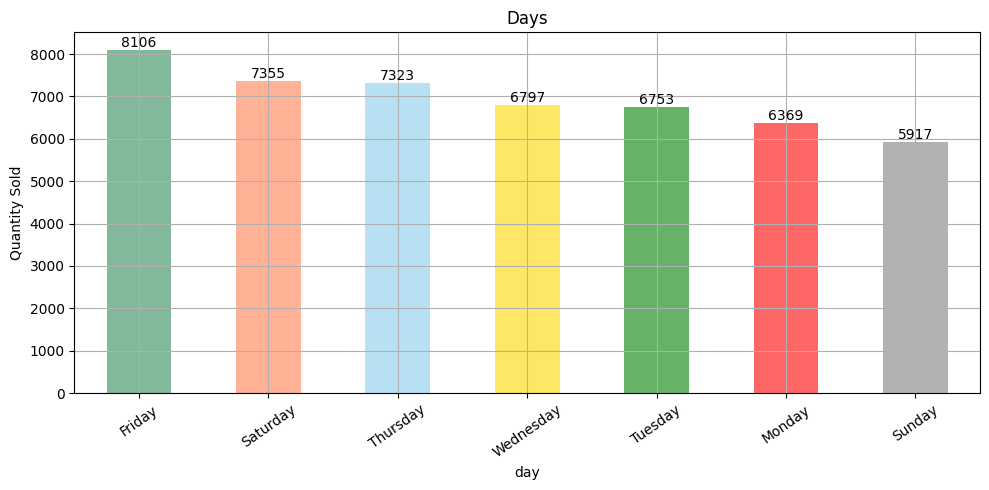

In [18]:
#Days of the Week
plt.figure(figsize=(10,5))
colors = ['seagreen', 'coral', 'skyblue', 'gold', 'green','red','grey']
days_orders.plot(kind = 'bar', color = colors[:len(days_orders)], alpha = 0.6)
handles = [plt.Rectangle((0,0),1,1, color = color) for color in colors[:len(days_orders)]]
labels = days_orders.index.tolist()  # Use item names as labels
for i, v in enumerate(days_orders):
     plt.annotate(str(v),xy =(i,v), ha='center',va='bottom')

#plt.legend(handles,labels, title='Items')
plt.xticks(rotation = 35)
plt.grid(True)
plt.ylabel('Quantity Sold')
plt.title('Days')
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel

In [19]:
pizza['pizza_id'].unique()

array(['hawaiian_m', 'classic_dlx_m', 'five_cheese_l', 'ital_supr_l',
       'mexicana_m', 'thai_ckn_l', 'ital_supr_m', 'prsc_argla_l',
       'bbq_ckn_s', 'the_greek_s', 'spinach_supr_s', 'classic_dlx_s',
       'green_garden_s', 'ital_cpcllo_l', 'ital_supr_s', 'mexicana_s',
       'spicy_ital_l', 'spin_pesto_l', 'veggie_veg_s', 'mexicana_l',
       'southw_ckn_l', 'bbq_ckn_l', 'cali_ckn_l', 'cali_ckn_m',
       'pepperoni_l', 'cali_ckn_s', 'ckn_pesto_l', 'big_meat_s',
       'soppressata_l', 'four_cheese_l', 'napolitana_s', 'calabrese_m',
       'four_cheese_m', 'ital_veggie_s', 'mediterraneo_m',
       'peppr_salami_s', 'spinach_fet_l', 'napolitana_l', 'sicilian_l',
       'ital_cpcllo_m', 'southw_ckn_s', 'bbq_ckn_m', 'pepperoni_m',
       'prsc_argla_s', 'sicilian_m', 'veggie_veg_l', 'ckn_alfredo_s',
       'pepperoni_s', 'green_garden_l', 'green_garden_m', 'pep_msh_pep_l',
       'hawaiian_s', 'peppr_salami_m', 'ckn_alfredo_m', 'peppr_salami_l',
       'spin_pesto_s', 'thai_ckn_m'

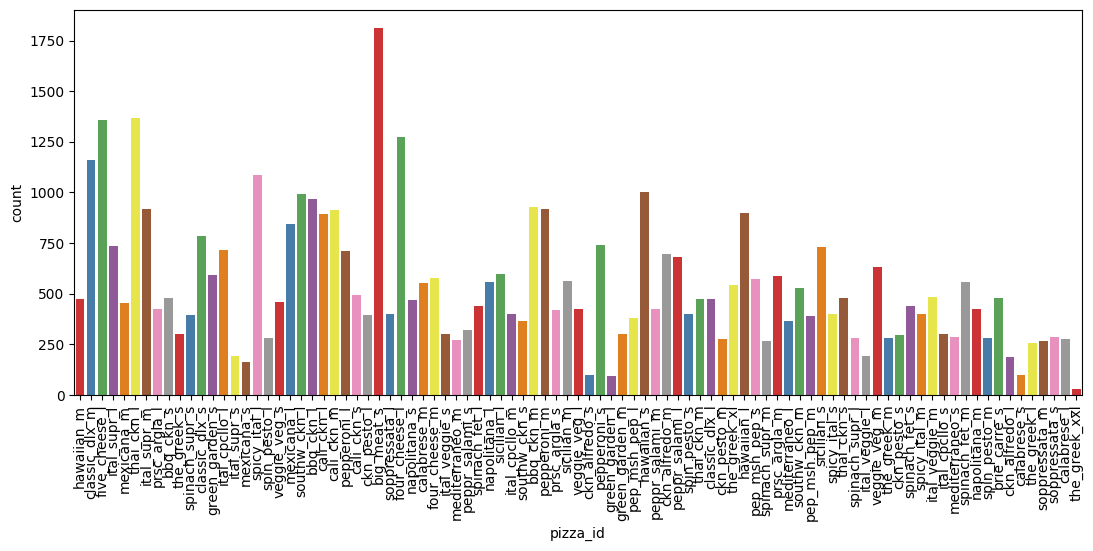

In [20]:
fig, ax = plt.subplots(figsize=(13,5))
sns.countplot(data = pizza, x = 'pizza_id', palette = 'Set1', ax= ax)
plt.xticks(rotation=90)
plt.show()

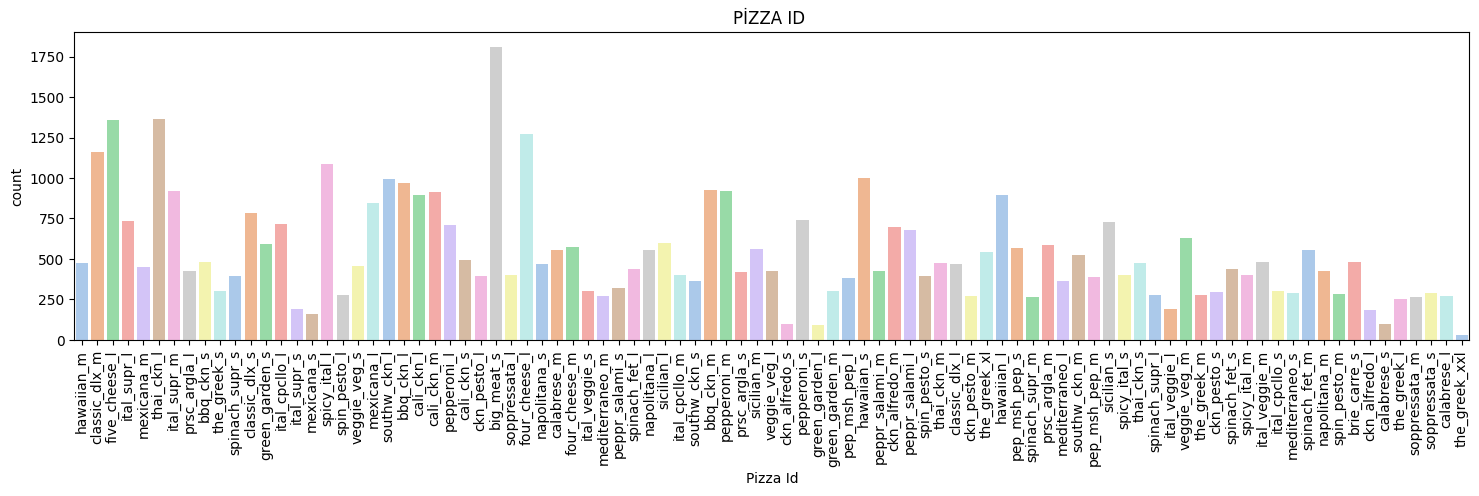

In [21]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=pizza,x="pizza_id",palette="pastel",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Pizza Id",fontsize=10,color="black")
plt.title("PİZZA ID ",color="black")
plt.show()

In [22]:
pizza['Month'] = pizza['order_datetime'].dt.month
monthly = pizza.groupby(pizza['order_datetime'].dt.to_period('M'))['total_price'].sum()
monthly.head(12)

order_datetime
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: total_price, dtype: float64

In [23]:
#Calculate AvG 
monthly_avg = monthly.mean().round()
print("Average Sales:",monthly_avg)

Average Sales: 68155.0


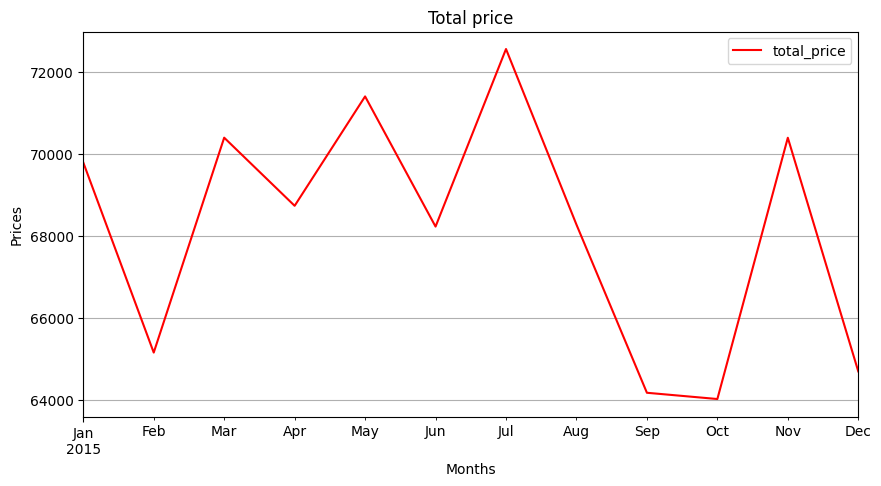

In [25]:
plt.figure(figsize=(10, 5))
#plt.subplot(2, 3, 1)

monthly.plot (title = 'Total price', color = 'red')

plt.xlabel('Months')
plt.ylabel('Prices')
plt.title('Total price')
plt.grid(True)
plt.legend();

In [26]:
pizza['pizza_size'].value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

Text(0.5, 1.0, 'Amount of Pizza Sizes')

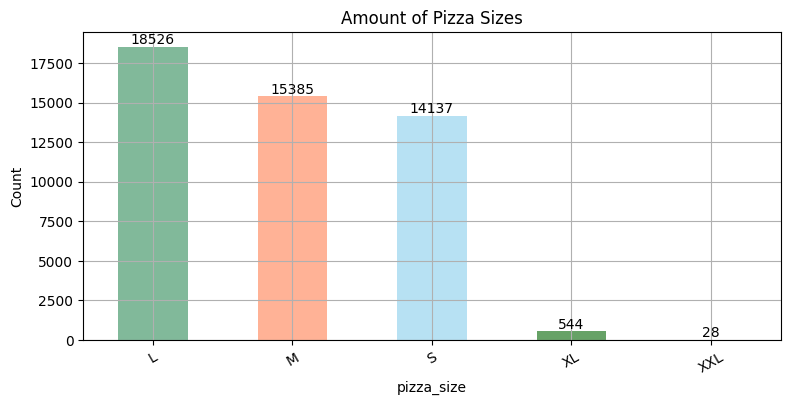

In [27]:
plt.figure(figsize=(9, 4))
colors = ['seagreen', 'coral', 'skyblue', 'darkgreen', 'red']
bars = pizza['pizza_size'].value_counts().plot(kind='bar', color=colors, alpha=0.6)

# Annotate each bar with its height
for bar in bars.patches:
    # Get the height of each bar
    height = bar.get_height()
    # Annotate the bar with its height
    plt.annotate(f'{height}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 ha='center', 
                 va='bottom')

plt.ylabel('Count')
plt.xticks(rotation=30)
plt.grid(True)
plt.title('Amount of Pizza Sizes')

In [28]:
pizza_menu = pizza.groupby('pizza_name')['unit_price'].value_counts()
pizza_menu

pizza_name                         unit_price
The Barbecue Chicken Pizza         20.75          967
                                   16.75          926
                                   12.75          479
The Big Meat Pizza                 12.00         1811
The Brie Carre Pizza               23.65          480
                                                 ... 
The Thai Chicken Pizza             12.75          476
                                   16.75          474
The Vegetables + Vegetables Pizza  16.00          630
                                   12.00          457
                                   20.25          423
Name: count, Length: 91, dtype: int64

In [29]:
top_selling = pizza['pizza_name'].value_counts(ascending=False)
top_selling

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [30]:
#Pizza Sizes in Pie Chart
fig=px.pie(pizza.groupby('pizza_size',as_index=False)['total_price'].count().sort_values(by='total_price',
                                                                                              ascending=False),names='pizza_size',
           values='total_price',color='pizza_size',hole=0.5,
           labels={'pizza_size':'pizza_size','total_price':'price'},
           template='ggplot2',title='<b>  Pizza Sizes')

fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='bottom',y=1.05,xanchor='right',x=1))



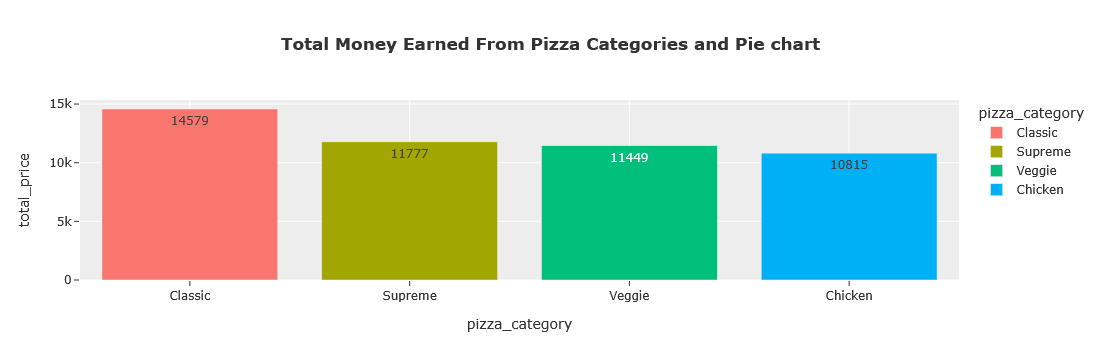

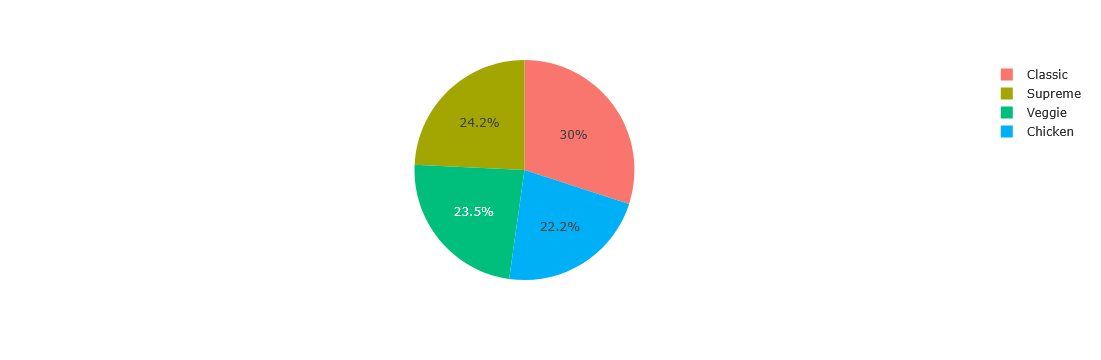

In [31]:
#Bar chart
z=pizza['pizza_category'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,
           labels={'index':'pizza_category','y':'total_price','text':'total_price'},
           template='ggplot2',
           title='<b>Total Money Earned From Pizza Categories and Pie chart</b> ')
fig.show()

#Pie Chart
fig=px.pie(z,names=z.index,values=z.values,
           labels={'index':'pizza_category','y':'total_price','text':'total_price'},
           template='ggplot2')
fig.show()

In [32]:
joint_data=pizza.sort_values(by='total_price', ascending=False)

top_rated=joint_data[:]
fig =px.sunburst(top_rated,
    path=['pizza_category',"pizza_size"],
    values='total_price',
    color='total_price')
fig.show()

In [33]:
df = pizza.groupby(["pizza_size","pizza_category"],as_index=False)[['total_price']].median().rename(columns={'total_price':'price'})

fig = px.treemap(df, path = [px.Constant("all"), "pizza_size","pizza_category"], 
                 values ='price', color='pizza_size', #values='price': This specifies that the size of each 
                 #rectangle in the treemap should be proportional to the median price calculated earlier.
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})

fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


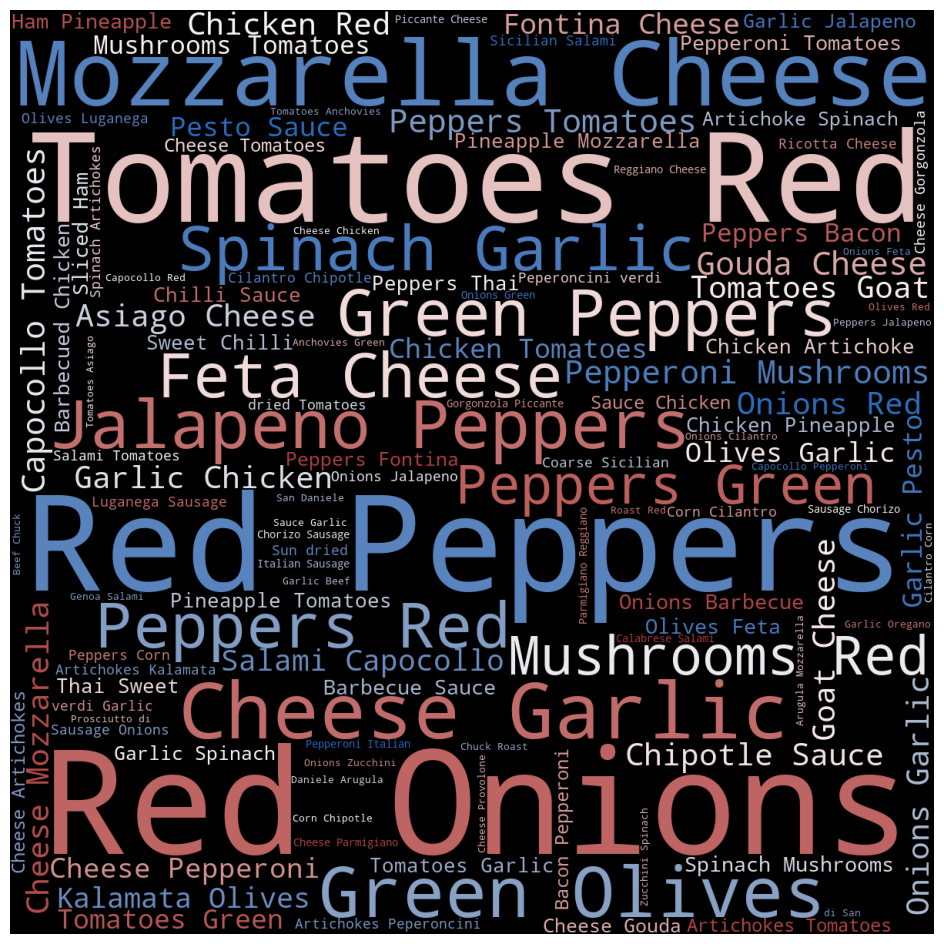

In [34]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(pizza['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()